In [ ]:
import torch 
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np



Dataset and DataLoader
Transforms 

In [ ]:
tf  = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

batch_size = 128


trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=tf)

trainloader = DataLoader(trainset, batch_size = batch_size, shuffle = True, num_workers= 20)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=tf)

testloader = DataLoader(trainset, batch_size = batch_size, shuffle=False, num_workers= 20 )



Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Files already downloaded and verified


In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
def imshow(img):
  img= img / 2+0.5
  npimg =  img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


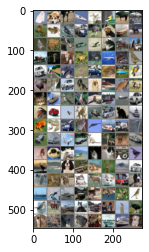

tensor([3, 5, 2, 8, 4, 2, 7, 8, 7, 6, 2, 9, 2, 6, 8, 7, 2, 6, 4, 1, 0, 3, 4, 9,
        0, 2, 7, 6, 4, 0, 6, 2, 1, 9, 0, 2, 1, 6, 1, 2, 2, 3, 1, 5, 5, 8, 3, 7,
        3, 8, 2, 6, 3, 8, 8, 1, 2, 1, 2, 2, 8, 1, 3, 8, 6, 6, 1, 6, 0, 8, 9, 2,
        1, 1, 0, 1, 3, 4, 4, 8, 3, 5, 7, 8, 3, 3, 9, 0, 4, 8, 5, 1, 6, 4, 0, 1,
        0, 2, 3, 3, 7, 3, 1, 5, 8, 0, 8, 8, 3, 3, 4, 2, 2, 7, 0, 3, 9, 7, 2, 2,
        3, 2, 2, 6, 6, 8, 8, 5])


In [ ]:
dataiter = iter(trainloader)

images, labels = dataiter.next()

imgs = torchvision.utils.make_grid(images) 
imshow(imgs)

print(labels)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class MyFirstNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
    self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
    self.fc1 = nn.Linear(in_features=16*5*5, out_features=280)
    self.fc2 = nn.Linear(in_features=280, out_features=120)
    self.fc3 = nn.Linear(in_features=120, out_features=84)
    self.fc4 = nn.Linear(in_features=84, out_features=10)

  
  def forward(self, x):
    # x = self.conv1(x)
    # x = nn.ReLU(x)
    # x = self.pool(x)

    x = self.pool(F.relu(self.conv1(x)))

    x = self.pool(F.relu(self.conv2(x)))

    x = torch.flatten(x,1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    return x

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
model = MyFirstNN().to(device)

In [ ]:
import torch.optim as optim


lossfunction  = nn.CrossEntropyLoss()

# optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum=0.9)

optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
for epoch in range(2):

  running_loss = 0.0
  for i , data in enumerate(trainloader,0):
    inputs , labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    outputs =  model(inputs)

    loss = lossfunction(outputs, labels)

    loss.backward()
    optimizer.step()

    running_loss = loss.item()

    if i %2000 == 1999:
      print("Epoch: ", epoch+1, " ", i+1, " ", running_loss/2000)
      running_loss = 0.0,




/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
correct  = 0
c = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images , labels = data
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    # print(outputs)
    
    _, pred = torch.max(outputs.data,1)
    # print(pred)
    

    total += len(labels)
    # print(total, labels.size(0))
    
    for i in range(len(labels)):
      if pred[i]==labels[i]:
          c +=1 
    correct +=(pred == labels).sum().item()
  acc = 100*correct/total
  a = 100*c/total
  print("accuracy: ", acc, a)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


accuracy:  52.332 52.332
